In [1]:
pip install tensorflow

  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl.metadata (14 kB)
Using cached tensorflow_io_gcs_filesystem-0.31.0-cp39-cp39-win_amd64.whl (1.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.19.0


In [3]:
#Load the dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Print dataset shape
print("Training data shape: ", x_train.shape)
print("Training target shape: ", y_train.shape)
print("Testing data shape: ", x_test.shape)
print("Testing target shape: ", y_test.shape)

Training data shape:  (60000, 28, 28)
Training target shape:  (60000,)
Testing data shape:  (10000, 28, 28)
Testing target shape:  (10000,)


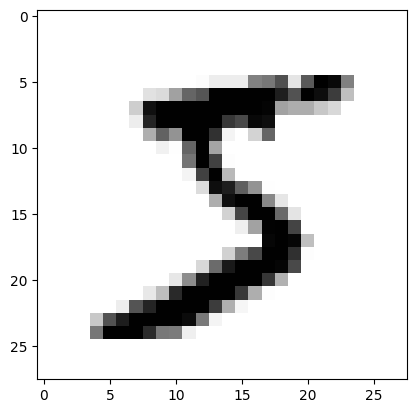

In [4]:
#Display an example image
plt.imshow(x_train[0], cmap='binary')
plt.show()

In [5]:
#One-hot encode the labels 
y_train_encoded = keras.utils.to_categorical(y_train, 10)
y_test_encoded = keras.utils.to_categorical(y_test,10)

print("Original Label: ",y_train[0])
print("Encoded Label: ",y_train_encoded[0])

Original Label:  5
Encoded Label:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten

#Create a sequential model
model = Sequential() 

#Flatten the 28x28 images into 784-dimensional vectors
model.add(Flatten(input_shape=(28,28)))

#Add a hidden layer with 128 neurons and ReLU activation 
model.add(Dense(128, activation = 'relu'))

#Output layer with 10 units(for 10 classes) and softmax activation
model.add(Dense(10, activation='softmax'))

#Print model summary
model.summary()

c:\Users\Ansh Thakkar\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

#Train the model on training data
history = model.fit(x_train, y_train_encoded, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8083 - loss: 7.9015 - val_accuracy: 0.8973 - val_loss: 0.4271
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8957 - loss: 0.4566 - val_accuracy: 0.9238 - val_loss: 0.2946
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9206 - loss: 0.3202 - val_accuracy: 0.9373 - val_loss: 0.2710
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9364 - loss: 0.2525 - val_accuracy: 0.9370 - val_loss: 0.2467
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9387 - loss: 0.2432 - val_accuracy: 0.9452 - val_loss: 0.2554


In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9283 - loss: 0.3171
Test Accuracy: 0.9372
Test Loss: 0.2991


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


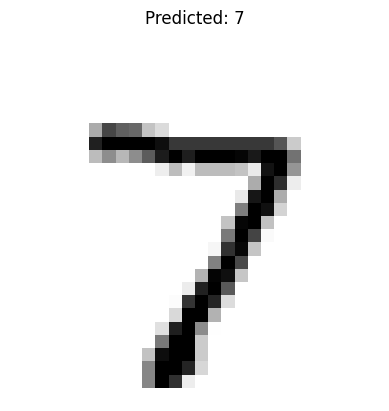

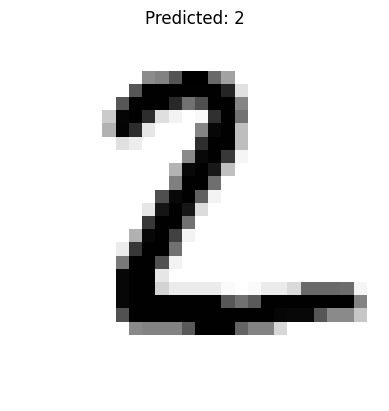

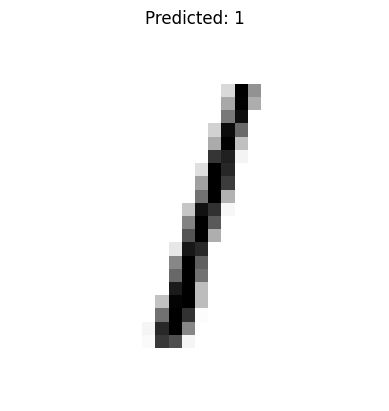

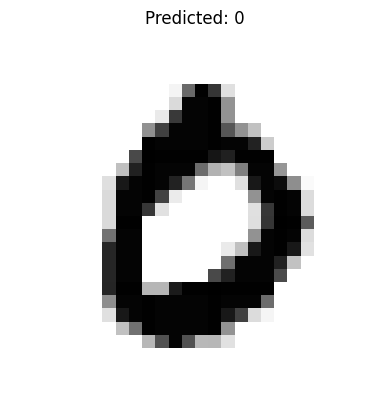

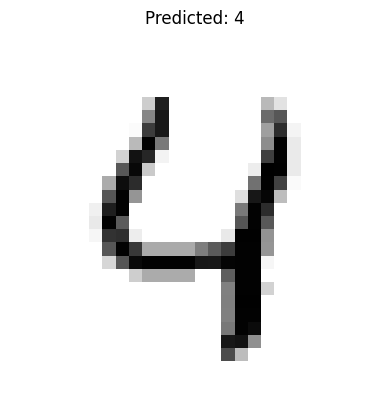

In [9]:
#Make predictions on the test set
predictions = model.predict(x_test)

#Show a few predictions with images
for i in range(5):
    plt.imshow(x_test[i], cmap='binary')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()

In [ ]:
#save the model
model.save("mnist_digit_classifier.h5")